# MOwNiT
## Laboratorium
### Całkowanie

In [2]:
using Pkg
Pkg.add("QuadGK")
using QuadGK
using Polynomials

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [3]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki
(xp, a) = gauss(Float64,7);

In [4]:
xp

7-element Vector{Float64}:
 -0.9491079123427585
 -0.7415311855993945
 -0.4058451513773972
  0.0
  0.4058451513773972
  0.7415311855993945
  0.9491079123427585

In [5]:
a

7-element Vector{Float64}:
 0.12948496616886981
 0.2797053914892767
 0.38183005050511887
 0.41795918367346907
 0.38183005050511887
 0.2797053914892767
 0.12948496616886981

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [6]:
f(x)=x^2
sum(a .* f.(xp))

0.6666666666666669

In [8]:
using QuadGK, Polynomials, Plots

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

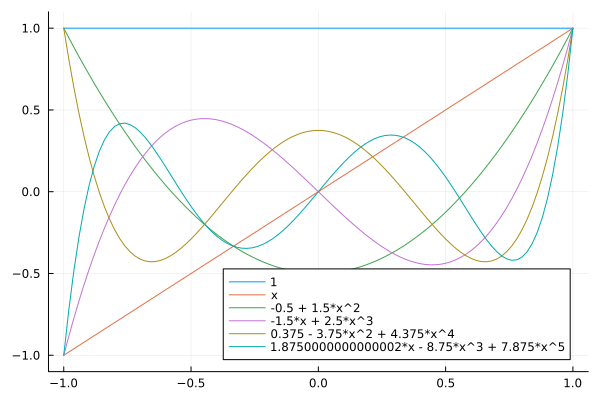

In [9]:
functions = Vector{Function}()
p0 = Polynomial([1])
p1 = Polynomial([0,1])
p2 = 3/2*p1*p1 - 1/2*p0
p3 = 5/3*p1*p2 - 2/3*p1
p4 = 7/4*p1*p3 - 3/4*p2
p5 = 9/5*p1*p4 - 4/5*p3
xs = -1:1
plot(p0,extrema(xs)...)
plot!(p1,extrema(xs)...)
plot!(p2,extrema(xs)...)
plot!(p3,extrema(xs)...)
plot!(p4,extrema(xs)...)
plot!(p5,
    extrema(xs)...,
    ylim = (-1.1,1.1))

In [ ]:
println("Stopień 2")
println(roots(p2))
xp, a = gauss(Float64,2)
println(xp)
println("---------")
println("Stopień 3")
println(roots(p3))
xp, a = gauss(Float64,3)
println(xp)
println("---------")
println("Stopień 4")
println(roots(p4))
xp, a = gauss(Float64,4)
println(xp)

# Jak mozna zauwazyc wyliczone zera sa rowne zerom Gausa

Stopień 2
[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]
---------
Stopień 3
[-0.7745966692414834, 0.7745966692414835, 0.0]
[-0.7745966692414834, 0.0, 0.7745966692414834]
---------
Stopień 4
[-0.861136311594053, -0.33998104358485637, 0.3399810435848563, 0.8611363115940521]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]


### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni (uwaga: dobrać takie współczynniki wielomianów, aby całka nie zerowała się w przedziale [-1.1])
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [15]:
function gaussIntegral(k,f)
    (xp, a) = gauss(k)
    return sum(a.*f.(xp))
end

gaussIntegral (generic function with 1 method)

In [82]:
test = [[if j != i  0 else i end for i in 1:j] for j in 1:10]
println(test)

for i in 1:10
    poly = Polynomial(test[i])
    println("Polynomial level: $(i) Calc: $(gaussIntegral(3,poly)) Expected: $(1^length(poly) - ((-1)^length(poly)))")
end

# Funkcja przestaje być dokładna przy stopniu wielomianu równym 7. Wynika to z twierdzenia o 
# stopniu dokładności kwadratury Gaussa - jest ona dokładna dla wielomianu o stopniu równym maksymalnie 2n-1
# zatem dla kwadratury równej 3 dokładność kończy się na wielomianie stopnia 5.

[[1], [0, 2], [0, 0, 3], [0, 0, 0, 4], [0, 0, 0, 0, 5], [0, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 7], [0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]]
Polynomial level: 1 Calc: 1.9999999999999998 Expected: 2
Polynomial level: 2 Calc: 0.0 Expected: 0
Polynomial level: 3 Calc: 2.0 Expected: 2
Polynomial level: 4 Calc: 0.0 Expected: 0
Polynomial level: 5 Calc: 2.0 Expected: 2
Polynomial level: 6 Calc: 0.0 Expected: 0
Polynomial level: 7 Calc: 1.6800000000000006 Expected: 2
Polynomial level: 8 Calc: 0.0 Expected: 0
Polynomial level: 9 Calc: 1.2960000000000005 Expected: 2
Polynomial level: 10 Calc: 0.0 Expected: 0


### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [32]:
function overallIntegral(k, f, a, b)
    (x, w) = gauss(k)
    mid = (b + a) / 2
    half = (b - a) / 2
    x_trans = half .* x .+ mid
    value = half * sum(w .* f.(x_trans))
    return value
end

overallIntegral (generic function with 1 method)

In [37]:
test1 = Polynomial([0, 2, 1])

for i in 1:5
    val = overallIntegral(i, test1, 0, 4)
    println("Quadrature: $i | Expected: 37.3333 | Got: $val")
end

# Pierwsza wartość jest niedokładana przez własność kwadratur gausa, przy wielomianie 1 stopnia dokladnosc to 1 (a polynomial jest stopnia 2)

Quadrature: 1 | Expected: 37.3333 | Got: 32.0
Quadrature: 2 | Expected: 37.3333 | Got: 37.33333333333333
Quadrature: 3 | Expected: 37.3333 | Got: 37.33333333333333
Quadrature: 4 | Expected: 37.3333 | Got: 37.333333333333336
Quadrature: 5 | Expected: 37.3333 | Got: 37.33333333333332


In [35]:
est1 = Polynomial([0,2,1])
for i in 1:5
    println("Quadrade: $(i) | Expected: 1,7183 Got: $(overallIntegral(i,exp,0,1))")
end

Quadrade: 1 | Expected: 1,7183 Got: 1.6487212707001282
Quadrade: 2 | Expected: 1,7183 Got: 1.7178963780075036
Quadrade: 3 | Expected: 1,7183 Got: 1.7182810043725216
Quadrade: 4 | Expected: 1,7183 Got: 1.7182818275260778
Quadrade: 5 | Expected: 1,7183 Got: 1.7182818284583912


In [36]:
test3 = cos
for i in 1:5
    println("Quadrade: $(i) | Expected: 1,6829 Got: $(overallIntegral(i,cos,-1,1))")
end

Quadrade: 1 | Expected: 1,6829 Got: 2.0
Quadrade: 2 | Expected: 1,6829 Got: 1.6758236553899857
Quadrade: 3 | Expected: 1,6829 Got: 1.6830035477269165
Quadrade: 4 | Expected: 1,6829 Got: 1.6829416886959732
Quadrade: 5 | Expected: 1,6829 Got: 1.6829419704071917


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [40]:
# Przykladowy wielomian
samplePoly = Polynomial([1,5,2,3])
println("Function: $(samplePoly) Interval: [-5,5]")
println("Expected: 176,67 Got: $(quadgk(samplePoly,-5,5)[1])")

Function: 1 + 5*x + 2*x^2 + 3*x^3 Interval: [-5,5]
Expected: 176,67 Got: 176.66666666666634


In [ ]:
# Rozklad normalny Gaussa
gaussFunction(x) = 1/sqrt(2*pi)*exp((-x^2)/2)
println("Function: $(gaussFunction) Interval: [-inf,inf]")
println("Expected: 1 Got: $(quadgk(gaussFunction,-Inf,Inf)[1])")

Function: gaussFunction Interval: [-inf,inf]
Expected: 1 Got: 1.0000000000032583


### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


In [49]:
using Plots

In [ ]:
using Plots

# przyblizanie prostokatami
function rectangle_integral(f, a, b, n)
    h = (b-a)/n
    value = 0
    for i in 1:1:n
        value += f(a+(i-0.5)*h)
    end
    return value * h
end

# przyblizanie trapezami
function trapezoid_integral(f, a, b, n)
    h = (b-a)/n
    value = 0
    for j in 1:1:n-1
        value += f(a + j * h)
    end
    value = (value + (a+b)/2)*h 
    return value
end

# Przy uzyciu wielomianu 2 stopnia
function simpson_integral(f, a, b, n)
    value  = 0
    st = 0
    h = (b-a)/n
    for i in 1:n
        x = a + i * h
        st += f(x - h / 2)
        if i < n 
            value += f(x)
        end
    end
    value = h / 6 * (f(a) + f(b) + 2 * value + 4 * st)
    return value
end

# Funkcja rysująca wykresy błędów
function plot_errors(f, a, b, exact, label)
    ns = 1:10
    hs = (b - a) ./ ns
    errors_rect = Float64[]
    errors_trap = Float64[]
    errors_simp = Float64[]

    for n in ns
        push!(errors_rect, abs(rectangle_integral(f, a, b, n) - exact))
        push!(errors_trap, abs(trapezoid_integral(f, a, b, n) - exact))
        push!(errors_simp, abs(simpson_integral(f, a, b, n) - exact))
    end

    plot(
        hs,
        [errors_rect errors_trap errors_simp],
        label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simpsona"],
        color=["red" "blue" "green"],
        layout=3,
        xflip=true,
        xlabel="h = (b - a) / n",
        ylabel="Błąd",
        title="Błąd dla $label",
        legend=:topright,
        markershape=:circle,
        linewidth=2
    )
end

# Testy
f1(x) = 3^x
a1, b1 = 1, 5
exact1 = 218.46

f2(x) = sin(x)
a2, b2 = 0, 2π
exact2 = 0.0

0.0

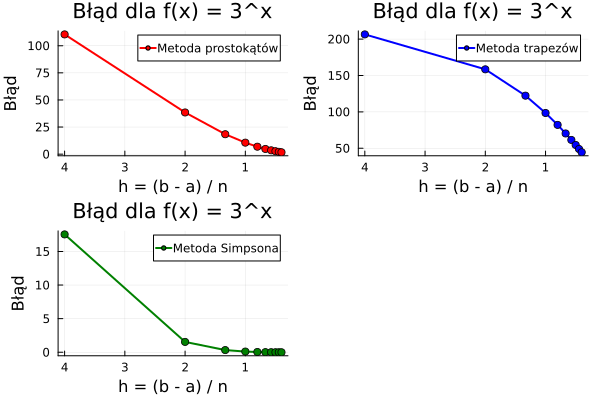

In [74]:
plot_errors(f1, a1, b1, exact1, "f(x) = 3^x")

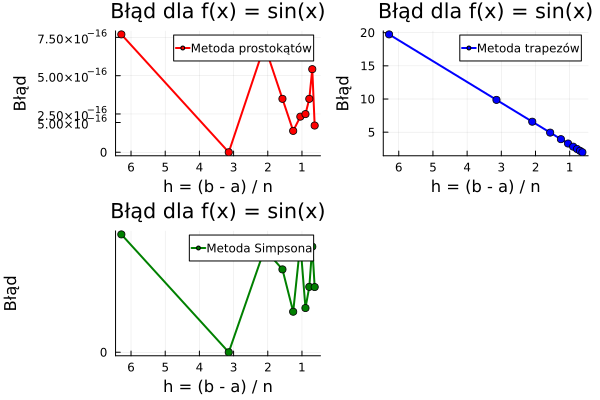

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [75]:
plot_errors(f2, a2, b2, exact2, "f(x) = sin(x)")